In [0]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Dimitris\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#drop target variable
X = df.drop('quality' , 1).values
y1 = df['quality'].values
y = y1 <= 5 # is the rating <= 5?

We are going to use a logistic regression in our model. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X. So in our case we treat the probleam as a binary classification for values <=5 and for values > 5.

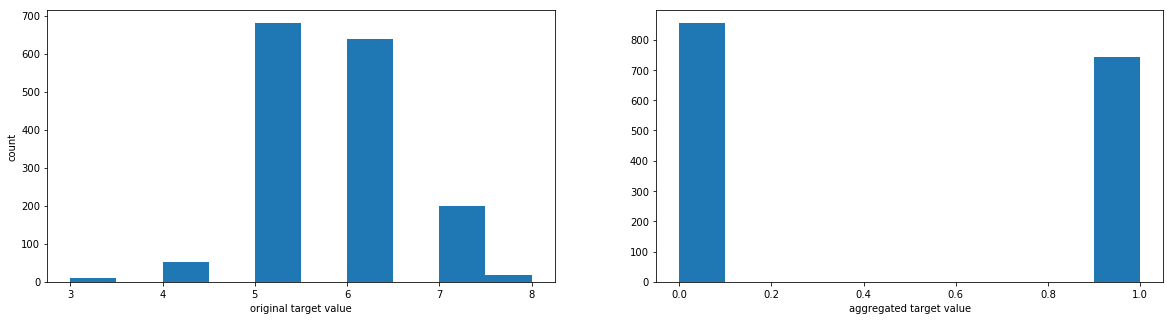

In [0]:
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

In [0]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split our dataset into test and train data.Training data is the data on which the machine learning programs learn to perform correlational tasks. Testing data is the data, whose outcome is already known (even the outcome of training data is known) and is used to determine the accuracy of the machine learning algorithm, based on the training data (how effectively the learning happened).  We will be using train data to train our model for predicting the quality. Also we take the 20% of the original population and use it for testing.

In [0]:
#initial logistic regression model
lr = linear_model.LogisticRegression()

In [0]:
# fit the model
lr = lr.fit(X_train, y_train)
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr.predict(X_test)
print(classification_report(y_true, y_pred))

Logistic Regression score for training set: 0.752932
             precision    recall  f1-score   support

      False       0.78      0.74      0.76       179
       True       0.69      0.74      0.71       141

avg / total       0.74      0.74      0.74       320



Above we see the performance of logistic regression in the dataset. Also I make an experiment with data scaling and I notice that it didn't improve the performance. The reason is that, if there predictor variables with large ranges that do not effect the target variable, a regression algorithm will make the corresponding coefficients aiai small so that they do not effect predictions so much.